### Skewness - kurtosis - return

In [1]:
import yfinance as yf
import pandas as pd

start_date = '2020-01-01'
end_date = '2024-03-16'

In [2]:
import FinanceDataReader as fdr

sp500 = fdr.StockListing('S&P500')
sp500

,Symbol,Name,Sector,Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Biotechnology
4,ACN,Accenture,Information Technology,IT Consulting & Other Services
...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment


In [27]:
data = yf.download(
    tickers = list(sp500['Symbol'].values),
    start = start_date,
    end = end_date
)['Adj Close']

[*********************100%%**********************]  503 of 503 completed

2 Failed downloads:
['BRKB', 'BFB']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [28]:
ret = data.pct_change(fill_method = None)

In [29]:
ret = ret[1:]

In [30]:
ret.dropna(axis = 1, inplace = True)

In [31]:
mean = ret.rolling(window = 60).mean()

In [32]:
std = ret.rolling(window = 60).std()
kurt = ret.rolling(window = 60).kurt()

In [33]:
skew = ret.rolling(window = 60).skew()

In [34]:
mean_value = mean.dropna().stack().reset_index()[0]

In [35]:
skew_value = skew.dropna().stack().reset_index()[0]

In [36]:
std_value = std.dropna().stack().reset_index()[0]
kurt_value = kurt.dropna().stack().reset_index()[0]

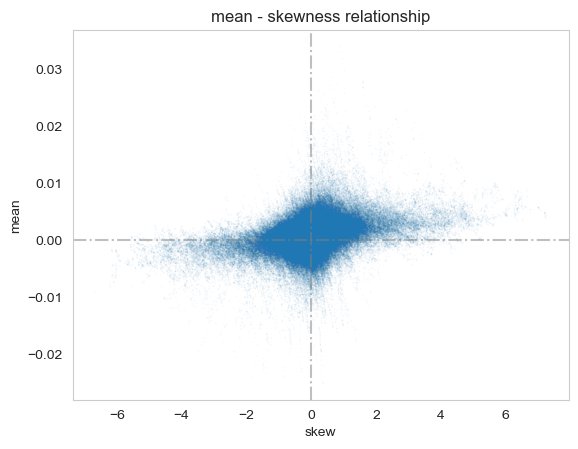

In [37]:
import matplotlib.pyplot as plt

plt.scatter(
    skew_value,
    mean_value,
    marker = '.',
    edgecolor = 'none',
    alpha = 0.05,
    s = 4
)
plt.axvline(0, ls = '-.', c = 'gray', alpha = 0.5)
plt.axhline(0, ls = '-.', c = 'gray', alpha = 0.5)
plt.grid(False)
plt.title('mean - skewness relationship')
plt.ylabel('mean')
plt.xlabel('skew')
plt.show()

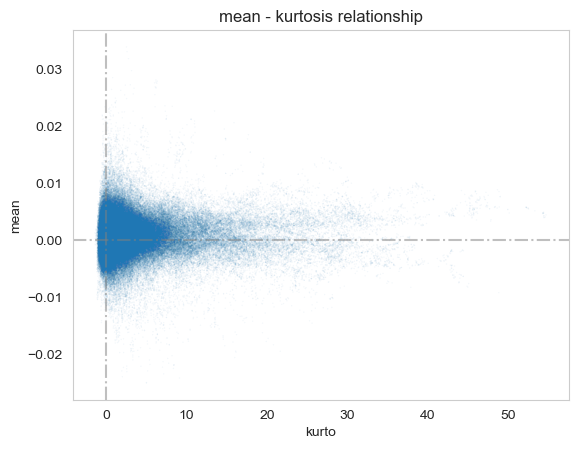

In [38]:
plt.scatter(
    kurt_value,
    mean_value,
    marker = '.',
    edgecolor = 'none',
    alpha = 0.05,s = 4
)
plt.axvline(0, ls = '-.', c = 'gray', alpha = 0.5)
plt.axhline(0, ls = '-.', c = 'gray', alpha = 0.5)
plt.grid(False)
plt.title('mean - kurtosis relationship')
plt.ylabel('mean')
plt.xlabel('kurto')
plt.show()

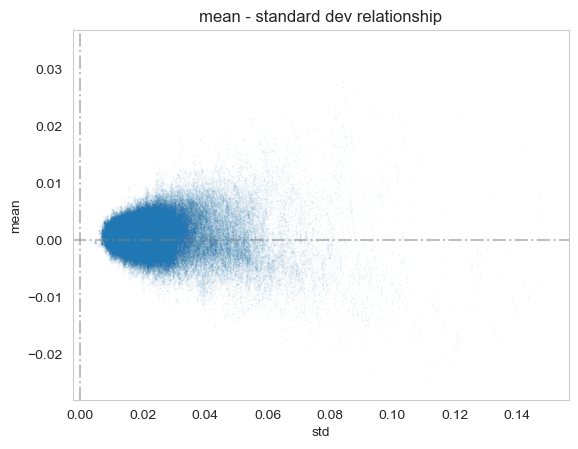

In [39]:
plt.scatter(
    std_value,
    mean_value,
    marker = '.',
    edgecolor = 'none',
    alpha = 0.05,
    s = 4
)
plt.axvline(0, ls = '-.', c = 'gray', alpha = 0.5)
plt.axhline(0, ls = '-.', c = 'gray', alpha = 0.5)
plt.grid(False)
plt.title('mean - standard dev relationship')
plt.ylabel('mean')
plt.xlabel('std')
plt.show()

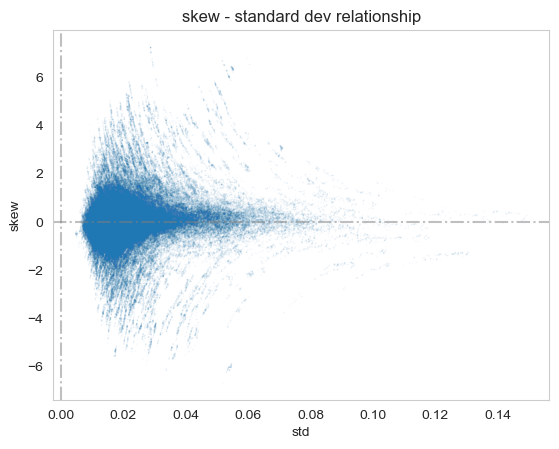

In [40]:
plt.scatter(
    std_value,
    skew_value,
    marker = '.',
    edgecolor = 'none',
    alpha = 0.05,
    s = 4
)
plt.axvline(0, ls = '-.', c = 'gray', alpha = 0.5)
plt.axhline(0, ls = '-.', c = 'gray', alpha = 0.5)
plt.grid(False)
plt.title('skew - standard dev relationship')
plt.ylabel('skew')
plt.xlabel('std')
plt.show()

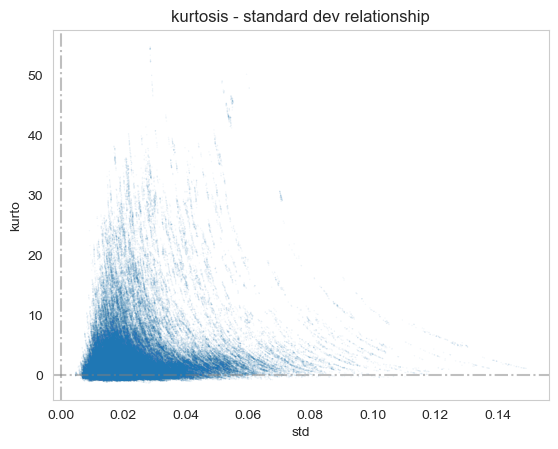

In [41]:
plt.scatter(
    std_value,
    kurt_value,
    marker = '.',
    edgecolor = 'none',
    alpha = 0.05,
    s = 4
)
plt.axvline(0, ls = '-.', c = 'gray', alpha = 0.5)
plt.axhline(0, ls = '-.', c = 'gray', alpha = 0.5)
plt.grid(False)
plt.title('kurtosis - standard dev relationship')
plt.ylabel('kurto')
plt.xlabel('std')
plt.show()

In [42]:
import plotly.io as pio
pio.renderers.default = 'notebook'

In [43]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = std_value
y = skew_value
z = mean_value

In [ ]:
import plotly.graph_objects as go

# Sample data for X, Y, Z axes
x = np.array([std_value.values]).reshape(-1, 1)
y = np.array([skew_value.values]).reshape(-1, 1)
z = np.array([mean_value.values]).reshape(-1, 1)

# Create the figure
fig = go.Figure(data=[go.Scatter3d(x = x.flatten(), y=y.flatten(), z=z.flatten(),
                                   mode='markers',
                                   marker=dict(size=1, opacity=0.3))])

# Update the layout
fig.update_layout(title='3D Scatter Plot', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90),
                  scene=dict(
                  xaxis_title='standard deviation',  # X-axis label
                  yaxis_title='skewness',  # Y-axis label
                  zaxis_title='return'   # Z-axis label
    ))

# Show the plot
fig.show()